# DBSCAN

**DBSCAN - Density-Based Spatial Clustering of Applications with Noise**

DBSCAN algoritması, simdiye kadar gormus oldugumuz kumelendirme algoritmalarindan farkli olarak:

- Kullanici tarafindan onceden belirlenen bir kume sayisina ihtiyac duymaz.
- Kumeleme islemi sonucunda hicbir kumeye ait olmayan, aykiri ornekleri bulabilir.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, pipeline, preprocessing
from ipywidgets import interact

## DBSCAN'de onemli konseptler

- $p$ noktasindaki yogunluk = $p$ noktasinin **$\varepsilon$** yakinliginda bulunan orneklerin sayisi ($p$ noktasinin kendisi dahil)
- $p$ noktasi yogun bolgededir $\iff$ $p$ noktasindaki yogunluk $\ge$ `minPts`



### Tanimlar

- **Core** - cekirdek ornekler: Yogun bolgede bulunan ornekler
- **Border** - sinir ornekler: Cekirdek orneklere $\varepsilon$ yakinlikta bulunan ornekler
- **Noise** - aykiri ornekler: Tum cekirdek orneklerden $\varepsilon$'dan fazla mesafede bulunan ornekler

In [2]:
X, y = datasets.make_blobs(random_state=42)

In [3]:
model = cluster.DBSCAN(eps=0.9, min_samples=5)
c = model.fit_predict(X[y==1])

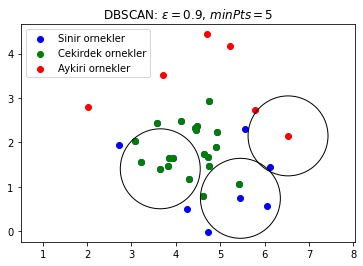

In [4]:
from cProfile import label


plt.scatter(*X[y==1][c!=-1].T, color="blue", label="Sinir ornekler");
plt.scatter(*X[y==1][model.core_sample_indices_].T, color="green", label="Cekirdek ornekler");
plt.scatter(*X[y==1][c==-1].T, color="red", label="Aykiri ornekler");
plt.gcf().gca().add_artist(plt.Circle((tuple(X[y==1][model.core_sample_indices_[0]])), 0.9, color="black", fill=False));
plt.gcf().gca().add_artist(plt.Circle((tuple(X[y==1][c==-1][2])), 0.9, color="black", fill=False, label="$\varepsilon$ yakinlik"));
plt.gcf().gca().add_artist(plt.Circle((tuple(X[y==1][c==0][0])), 0.9, color="black", fill=False, label="$\varepsilon$ yakinlik"));
plt.legend();
plt.axis("equal");
plt.title(r"DBSCAN: $\varepsilon = 0.9$, $minPts=5$");

Yukaridaki sekilde; $\varepsilon = 0.9$, $minPts = 5$ icin cekirdek, sinir ve aykiri ornekler farkli renklerle gosterilmistir.

Her ornek tipinden birer ornek icin $\varepsilon$ yakinlik cemberleri gosterilmistir.

- Cekirdek ornegin $\varepsilon$ yakinliginda en az 5 ornek bulunmaktadir.
- Sinir ornegin $\varepsilon$ yakinliginda en az 1 cekirdek ornek bulunmaktadir.
- Aykiri ornegin $\varepsilon$ yakinliginda hicbir cekirdek ornek bulunmamaktadir.

### Farkli parametreler icin sonuclar

Asagidaki hucrede, farkli $\varepsilon$ ve $minPts$ degerleri icin kumeleme sonuclarini inceleyebilirsiniz.

In [5]:
from ipywidgets import SelectionSlider
@interact(
    k=(0,X.shape[0]-1,1), 
    eps=SelectionSlider(options=np.arange(0.1, 2.0,0.1).round(1).tolist() + [5., 10., 20.], value=1.0),
    minPts=SelectionSlider(options=[2, 3, 4, 5, 10, 20], value=5)
)
def sbviz(k=50, eps=1.0, minPts=5):
    model = cluster.DBSCAN(eps=eps, min_samples=minPts, )
    clusters = model.fit_predict(X)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(*X[clusters!=-1].T, c=clusters[clusters!=-1], edgecolors='green', label='border sample', s=70, cmap='spring')
    ax.scatter(*X[model.core_sample_indices_].T, c=clusters[model.core_sample_indices_], edgecolors='blue', label='core sample', cmap='spring')
    ax.scatter(*X[clusters==-1].T, color='red', label='outlier')
    for i, (x, y) in enumerate(X):
        if clusters[i] == -1:
            ax.text(x, y, str(i))
        if i == k:
            circle = plt.Circle((x, y), radius=model.eps, fill=False)

            plt.gcf().gca().add_artist(circle)
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.title(f'DBSCAN - $\\epsilon={eps: .1f}$')

interactive(children=(IntSlider(value=50, description='k', max=99), SelectionSlider(description='eps', index=9…

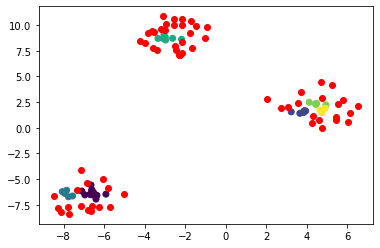

In [3]:
m = cluster.DBSCAN()

clusters = m.fit_predict(X)
plt.scatter(*X[clusters!=-1].T, c=clusters[clusters!=-1])
plt.scatter(*X[clusters==-1].T, color='red');

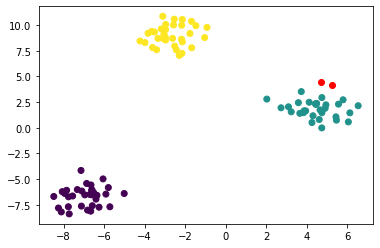

In [4]:
m = cluster.DBSCAN(1.3)

clusters = m.fit_predict(X)
plt.scatter(*X[clusters!=-1].T, c=clusters[clusters!=-1])
plt.scatter(*X[clusters==-1].T, color='red');

In [5]:
m.fit_predict(X)

array([ 0,  1,  2,  1,  0,  1,  2,  1,  1,  2,  2,  0,  0,  2,  2,  0,  0,
        2,  0,  0,  2,  0,  0,  2,  2,  2,  1,  0,  0,  0,  0,  1,  1,  0,
        2,  2,  2,  2,  1,  1,  0,  2,  1,  2,  2,  1,  0,  0,  0,  1,  1,
        1,  2,  0,  0,  0,  2,  2,  1,  2,  0,  1,  0,  1,  0,  0, -1,  0,
        1,  1,  1,  0,  0,  2,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,  2,
        2,  2,  1,  2,  1,  1,  1,  2, -1,  2,  2,  2,  1,  0,  2],
      dtype=int64)

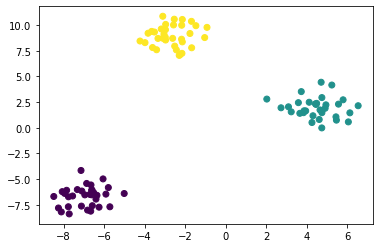

In [6]:
p = pipeline.Pipeline([('1', preprocessing.StandardScaler()), ('2', cluster.DBSCAN())])

clusters = p.fit_predict(X)
plt.scatter(*X[clusters!=-1].T, c=clusters[clusters!=-1])
plt.scatter(*X[clusters==-1].T, color='red')


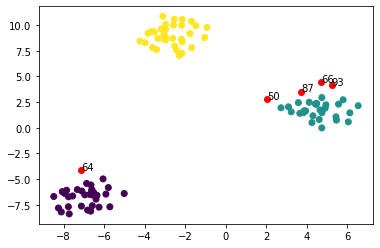

In [7]:
%matplotlib inline
model = cluster.DBSCAN(eps=1.0)

clusters = model.fit_predict(X)
plt.scatter(*X[clusters!=-1].T, c=clusters[clusters!=-1])
plt.scatter(*X[clusters==-1].T, color='red')
for i, (x, y) in enumerate(X):
    if clusters[i] == -1:
        plt.text(x, y, str(i))

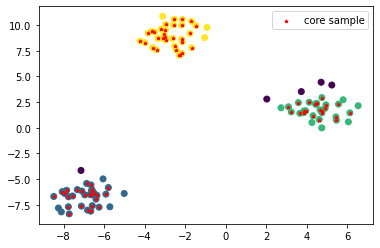

In [8]:
plt.scatter(*X.T, c=clusters)
plt.scatter(*X[model.core_sample_indices_].T, color='red', s=10, marker='*', alpha=0.9, edgecolors='red', label='core sample')
plt.legend()